In [141]:
# page4

import pandas as pd

submission = pd.read_csv('sample_submission.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [133]:
# page5

print(submission.head(5))

   index  0  1  2
0  26457  0  0  0
1  26458  0  0  0
2  26459  0  0  0
3  26460  0  0  0
4  26461  0  0  0


In [115]:
# page6

print(train.tail(5))

       index gender car reality  child_num  income_total    income_type  \
26452  26452      F   N       N          2      225000.0  State servant   
26453  26453      F   N       Y          1      180000.0        Working   
26454  26454      F   Y       N          0      292500.0        Working   
26455  26455      M   N       Y          0      171000.0        Working   
26456  26456      F   N       N          0       81000.0        Working   

                            edu_type           family_type         house_type  \
26452  Secondary / secondary special               Married  House / apartment   
26453               Higher education             Separated  House / apartment   
26454  Secondary / secondary special        Civil marriage       With parents   
26455              Incomplete higher  Single / not married  House / apartment   
26456  Secondary / secondary special        Civil marriage  House / apartment   

       DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phon

In [116]:
# page7

print(train.columns)
print("-"*20)
print(train.shape)

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')
--------------------
(26457, 20)


In [117]:
# page8

print(train['income_type'].unique())
print()
print(train['income_type'].value_counts())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']

income_type
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: count, dtype: int64


In [118]:
# page9

print("edu_type=", train['edu_type'].unique())
print("family_type=", train['family_type'].unique())
print("house_type=", train['house_type'].unique())


edu_type= ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
family_type= ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
house_type= ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [119]:
# page10

print("credit=", train['credit'].unique()) # 낮을수록 높은 신용의 신용카드 사용자 0, 1, 2

credit= [1. 2. 0.]


In [120]:
# page11

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [121]:
# page12

print(train.describe())

              index     child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED  \
count  26457.000000  26457.000000  2.645700e+04  26457.000000   26457.000000   
mean   13228.000000      0.428658  1.873065e+05 -15958.053899   59068.750728   
std     7637.622372      0.747326  1.018784e+05   4201.589022  137475.427503   
min        0.000000      0.000000  2.700000e+04 -25152.000000  -15713.000000   
25%     6614.000000      0.000000  1.215000e+05 -19431.000000   -3153.000000   
50%    13228.000000      0.000000  1.575000e+05 -15547.000000   -1539.000000   
75%    19842.000000      1.000000  2.250000e+05 -12446.000000    -407.000000   
max    26456.000000     19.000000  1.575000e+06  -7705.000000  365243.000000   

       FLAG_MOBIL    work_phone         phone         email   family_size  \
count     26457.0  26457.000000  26457.000000  26457.000000  26457.000000   
mean          1.0      0.224742      0.294251      0.091280      2.196848   
std           0.0      0.417420      0.455714   

In [142]:
# page13

#날짜 단위 변환

train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
train['DAYS_EMPLOYED'] = (train['DAYS_EMPLOYED'] * -1) / 365.0
train['DAYS_BIRTH'] = (train['DAYS_BIRTH'] * -1) / 365.0
train['begin_month'] = (train['begin_month'] * -1)

test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
test['DAYS_EMPLOYED'] = (test['DAYS_EMPLOYED'] * -1) / 365.0
test['DAYS_BIRTH'] = (test['DAYS_BIRTH'] * -1) / 365.0
test['begin_month'] = (test['begin_month'] * -1)

In [135]:
# page14

categories = train.select_dtypes(exclude='number')

for feature in categories:
  print(train[feature].value_counts(normalize=True)) # 백분율로 보자
  print("-"*50)

gender
F    0.668897
M    0.331103
Name: proportion, dtype: float64
--------------------------------------------------
car
N    0.620252
Y    0.379748
Name: proportion, dtype: float64
--------------------------------------------------
reality
Y    0.673924
N    0.326076
Name: proportion, dtype: float64
--------------------------------------------------
income_type
Working                 0.515743
Commercial associate    0.234418
Pensioner               0.168160
State servant           0.081415
Student                 0.000265
Name: proportion, dtype: float64
--------------------------------------------------
edu_type
Secondary / secondary special    0.680160
Higher education                 0.270703
Incomplete higher                0.038553
Lower secondary                  0.009714
Academic degree                  0.000869
Name: proportion, dtype: float64
--------------------------------------------------
family_type
Married                 0.687757
Single / not married    0.132139
Civ

In [143]:
# page15

train['occyp_type'] = train['occyp_type'].fillna('No job')
test['occyp_type'] = train['occyp_type'].fillna('No job')

In [125]:
# page16

print(round(train['occyp_type'].value_counts(normalize=True)*100, 2))

occyp_type
No job                   30.88
Laborers                 17.05
Core staff               10.00
Sales staff               9.60
Managers                  8.19
Drivers                   5.95
High skill tech staff     3.93
Accountants               3.41
Medicine staff            3.27
Cooking staff             1.73
Security staff            1.60
Cleaning staff            1.52
Private service staff     0.92
Low-skill Laborers        0.48
Waiters/barmen staff      0.47
Secretaries               0.37
Realty agents             0.24
HR staff                  0.23
IT staff                  0.15
Name: proportion, dtype: float64


In [126]:
# page17

train.to_csv('train_preprocessed.csv', index=False)
test.to_csv('test_preprocessed.csv', index=False)

In [127]:
# page20

print(train['credit'].value_counts())

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64


In [144]:
# page22

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [145]:
# page24

from sklearn.preprocessing import LabelEncoder

le_arry = {} # le.inverse_tranform()이 아니더라도 아래쪽 예제에 index에 따른 name이 필요하다 그래서 저장함

cols = train.select_dtypes(include=['object']).columns

for col in cols:
  le = LabelEncoder()
  le_arry[col] = le
  train[col] = le.fit_transform(train[col])
  print("le.classes_=", col, le.classes_)
  test[col] = le.fit_transform(test[col])
  print("le.classes_=", col, le.classes_)

print(le_arry)

le.classes_= gender ['F' 'M']
le.classes_= gender ['F' 'M']
le.classes_= car ['N' 'Y']
le.classes_= car ['N' 'Y']
le.classes_= reality ['N' 'Y']
le.classes_= reality ['N' 'Y']
le.classes_= income_type ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
le.classes_= income_type ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
le.classes_= edu_type ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
le.classes_= edu_type ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
le.classes_= family_type ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
le.classes_= family_type ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
le.classes_= house_type ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
le.classes_= house_type ['Co-o

In [146]:
# page25

print(train.head(5))

   index  gender  car  reality  child_num  income_total  income_type  \
0      0       0    0        0          0      202500.0            0   
1      1       0    0        1          1      247500.0            0   
2      2       1    1        1          0      450000.0            4   
3      3       0    0        1          0      202500.0            0   
4      4       0    1        1          0      157500.0            2   

   edu_type  family_type  house_type  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0         1            1           2   38.079452      12.901370           1   
1         4            0           1   31.178082       4.219178           1   
2         1            1           1   52.293151      12.147945           1   
3         4            1           1   41.336986       5.731507           1   
4         1            1           1   41.197260       5.767123           1   

   work_phone  phone  email  occyp_type  family_size  begin_month  credit  
0           0   

In [149]:
# page26

X = train.drop(columns='credit')
y = train['credit']

In [150]:
# page28

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [151]:
# page29

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {round(acc,4)}')

Accuracy: 0.5865


In [152]:
# page32

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred, labels=[0,1,2])
print(cm)

[[ 164  156  330]
 [ 174  521  567]
 [ 379  582 2419]]


In [153]:
# page33

pred = model.predict_proba(test)
print(pred)
print("-"*40)
submission.iloc[:,1:] = pred # 결과값으로 update
print(submission)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
----------------------------------------
      index  0  1  2
0     26457  0  0  1
1     26458  0  0  1
2     26459  1  0  0
3     26460  0  0  1
4     26461  0  1  0
...     ... .. .. ..
9995  36452  0  0  1
9996  36453  1  0  0
9997  36454  0  1  0
9998  36455  0  1  0
9999  36456  1  0  0

[10000 rows x 4 columns]


In [154]:
# page34

submission.to_csv('submission_1.csv', index=False)

In [155]:
# page36 - EDA

import matplotlib.pyplot as plt
import seaborn as sns

rc = {
    'axes.facecolor':'#F6F6F6',
    'figure.facecolor':'#B8B8B8',
    'axes.edgecolor':'#000000',
    'grid.color':'#C4C4C4',
    'axes.labelcolor':'#000000',
    'xtick.color':'#000000',
    'ytick.color':'#000000',
    'grid.alpha':0.4
}

sns.set(rc)

<Axes: xlabel='credit', ylabel='count'>

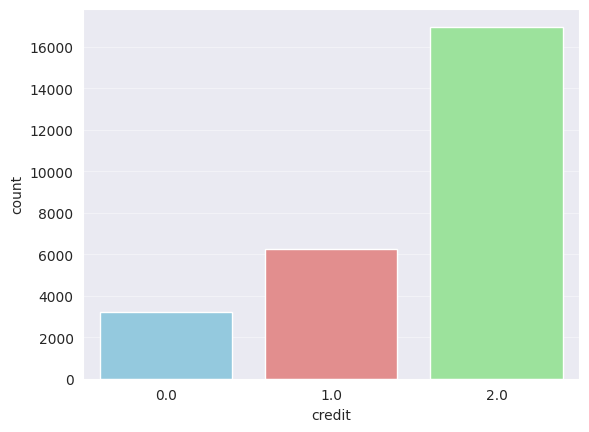

In [156]:
# page37

custom_palette = ['skyblue', 'lightcoral', 'lightgreen']

sns.countplot(train, x='credit', hue='credit', palette=custom_palette, legend=False)

In [158]:
# page38

train['FLAG_MOBIL'] = train['FLAG_MOBIL'].astype('object')
train['work_phone'] = train['work_phone'].astype('object')
train['phone'] = train['phone'].astype('object')
train['email'] = train['email'].astype('object')

# 이걸 안하면 LabelEncoder에서 바뀐 데이터들이 전부 숫자 취급된다
train['gender'] = train['gender'].astype('object')
train['car'] = train['car'].astype('object')
train['reality'] = train['reality'].astype('object')
train['income_type'] = train['income_type'].astype('object')
train['edu_type'] = train['edu_type'].astype('object')
train['family_type'] = train['family_type'].astype('object')
train['house_type'] = train['house_type'].astype('object')
train['occyp_type'] = train['occyp_type'].astype('object')

print(train.info())

train_num = train.select_dtypes(include='number')
train_num['credit'] = train['credit']
train_cat = train.select_dtypes(exclude='number')
train_cat['credit'] = train['credit']

print(train_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  float64
 11  DAYS_EMPLOYED  26457 non-null  float64
 12  FLAG_MOBIL     26457 non-null  object 
 13  work_phone     26457 non-null  object 
 14  phone          26457 non-null  object 
 15  email          26457 non-null  object 
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
# page39

train_num.describe()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,occyp_type,family_size,begin_month,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.331103,0.379748,0.673924,0.428658,1.873065e+05,2.394754,3.097592,1.367275,1.279813,43.720696,6.023369,9.145973,2.196848,26.123294,1.519560
std,7637.622372,0.470619,0.485333,0.468784,0.747326,1.018784e+05,1.735900,1.341602,0.952536,0.944273,11.511203,6.493536,4.296187,0.916717,16.559550,0.702283
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,21.109589,0.000000,0.000000,1.000000,-0.000000,0.000000
25%,6614.000000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,34.098630,1.115068,6.000000,2.000000,12.000000,1.000000
50%,13228.000000,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,42.594521,4.216438,10.000000,2.000000,24.000000,2.000000
75%,19842.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,53.235616,8.638356,12.000000,3.000000,39.000000,2.000000
max,26456.000000,1.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,68.909589,43.049315,18.000000,20.000000,60.000000,2.000000


In [ ]:
train_cat.describe()

,credit
count,26457.000000
mean,1.519560
std,0.702283
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


8


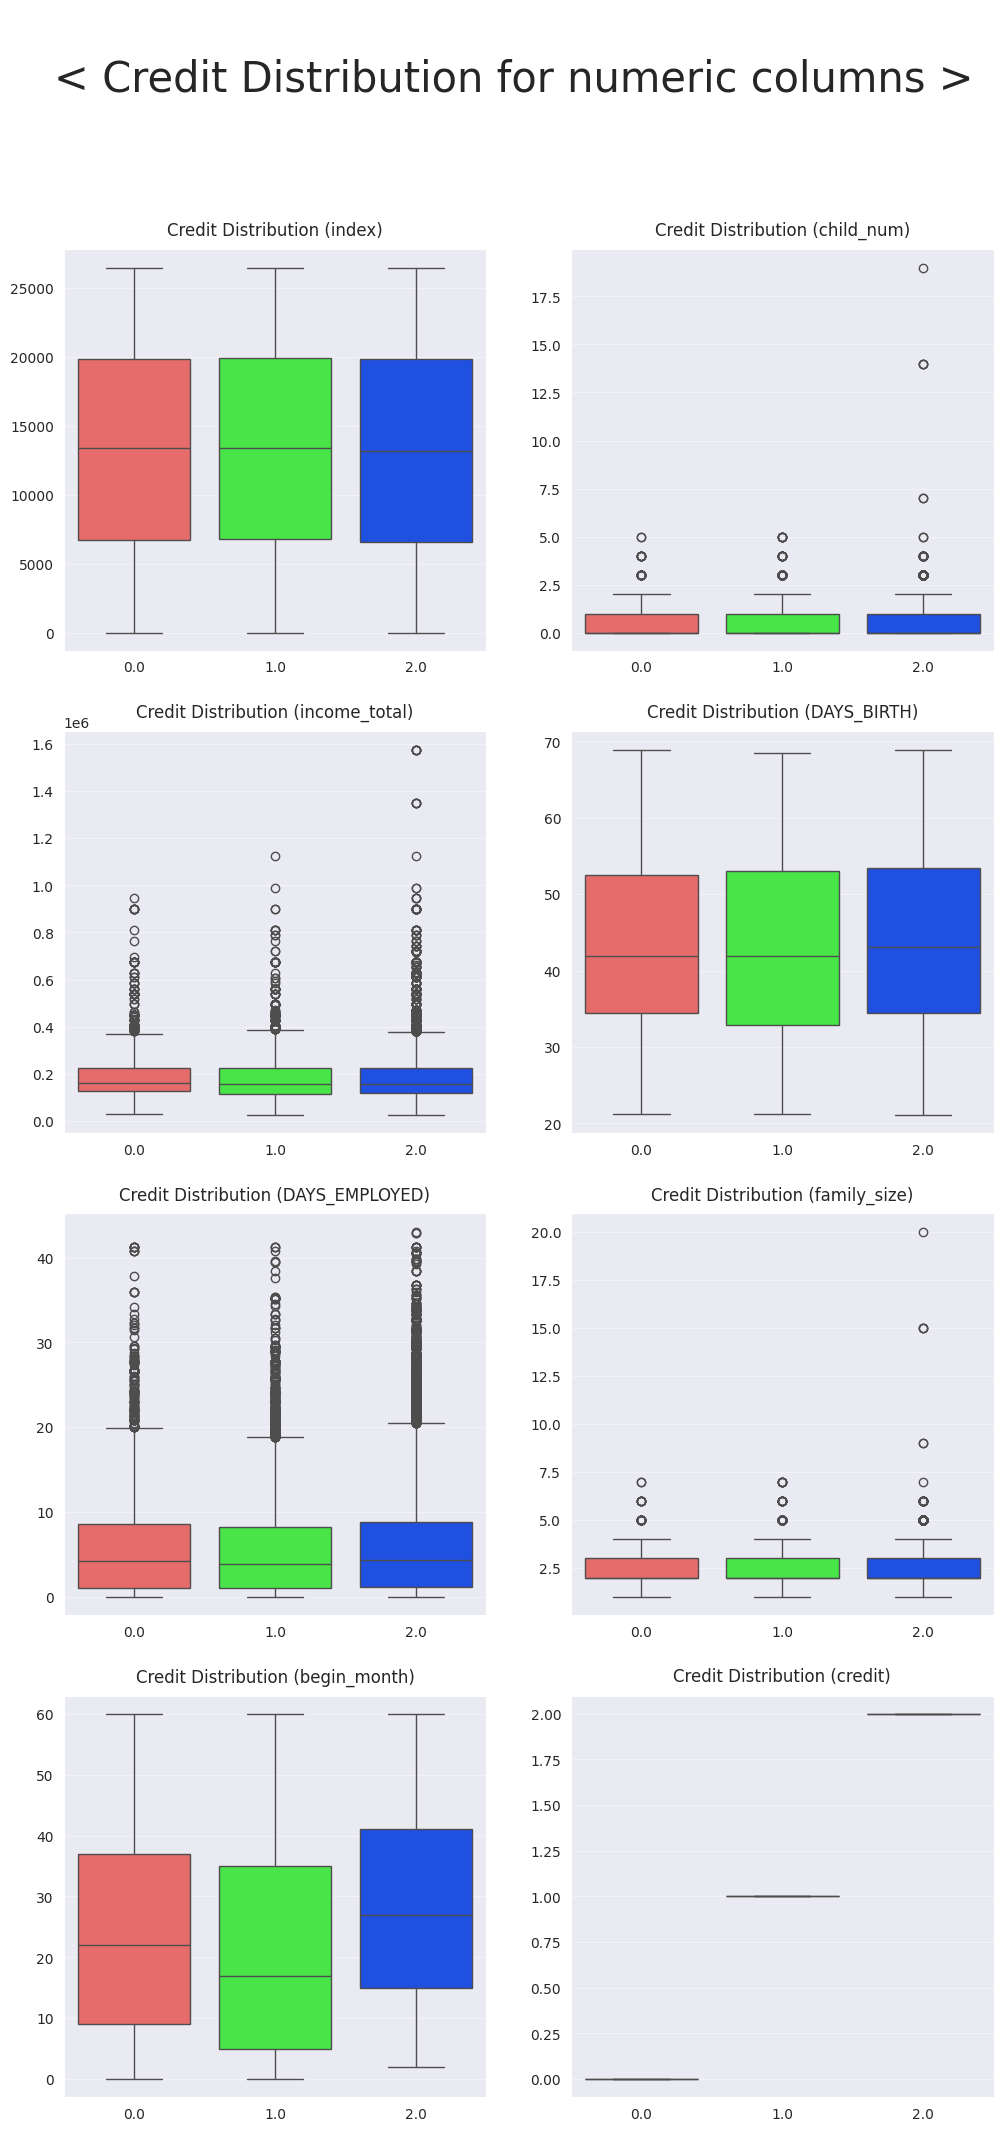

In [159]:
# page41

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,24))
axes = axes.flatten()

color = ['#FA5858','#2EFE2E','#0040FF']

num_eda_cols = train_num.columns

print(len(num_eda_cols))

for i, col in enumerate(num_eda_cols):
  sns.boxplot(data=train_num, y=col, x='credit', hue='credit', ax=axes[i], palette=color, legend=False)
  axes[i].set_title(f'Credit Distribution ({col})', pad=10)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

plt.suptitle('\n< Credit Distribution for numeric columns >', fontsize=30)
plt.show()

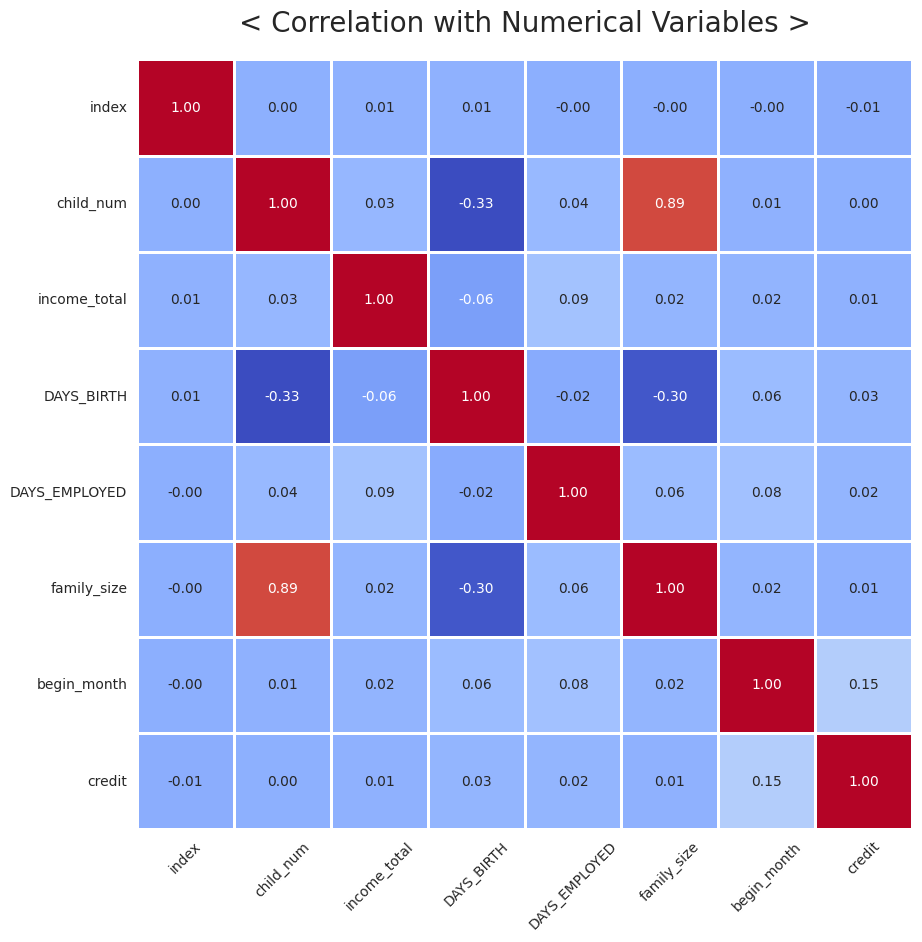

In [160]:
# page46

plt.figure(figsize=(10,10))
sns.heatmap(train_num.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=1, cbar=False)
plt.xticks(rotation=45)
plt.title('< Correlation with Numerical Variables >', pad=20, fontsize=20)
plt.show()

In [ ]:
# page48

sns.pairplot(train_num, hue='credit', markers=['o', 's', 'D'], palette=color)

Output hidden; open in https://colab.research.google.com to view.

11


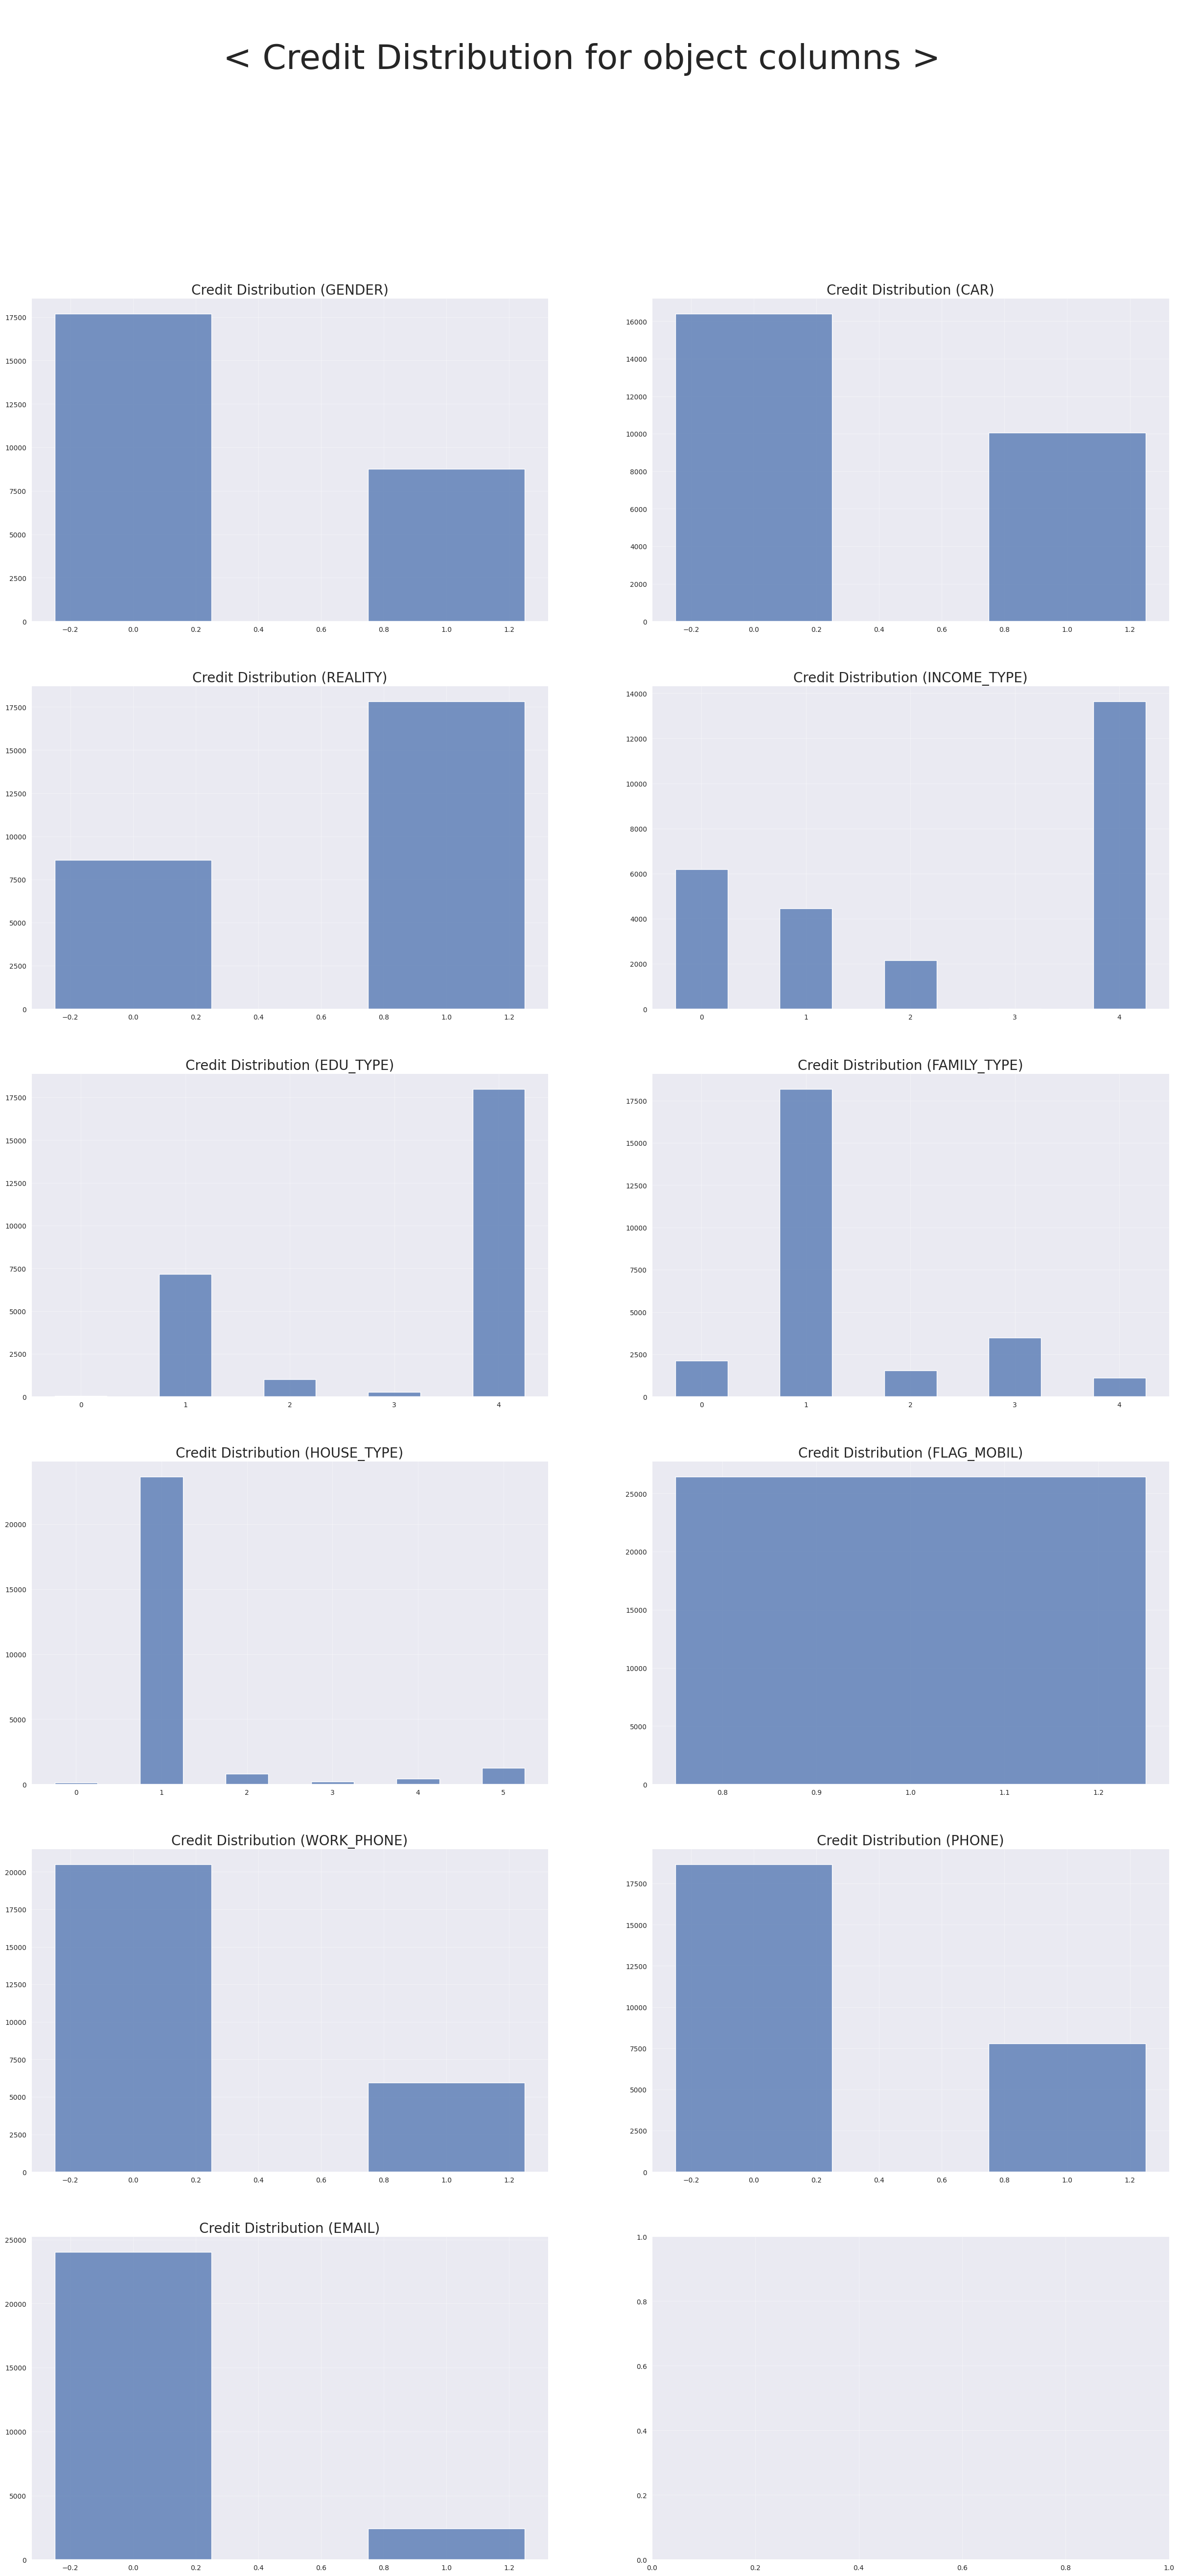

In [161]:
# page50

cat_EDA_cols = train_cat.columns[:-2]
print(len(cat_EDA_cols))

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30,60))
axes = axes.flatten()

for i, col in enumerate(cat_EDA_cols):
  ax = axes[i]

  sorted_col = train_cat[col].value_counts().sort_values(ascending=False).index

  train_cat[col] = pd.Categorical(train_cat[col], sorted_col)

  sns.histplot(data=train_cat, x=col, binwidth=0.5, shrink=0.5, ax=ax, multiple='dodge')
  ax.set_title(f'Credit Distribution ({col.upper()})', fontsize=20)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.suptitle('\n< Credit Distribution for object columns >', fontsize=50)
plt.show()

In [175]:
# page52

sorted_col = train_cat['occyp_type'].value_counts().sort_values(ascending=False).index
train_cat['occyp_type'] = pd.Categorical(train_cat['occyp_type'], sorted_col)

bin_cols = ['gender','car','reality','FLAG_MOBIL','work_phone','phone','email']

train_cat_bin = train_cat[bin_cols]
train_cat_bin['credit'] = train_cat['credit']
train_cat_over = train_cat.drop(columns=bin_cols)


7


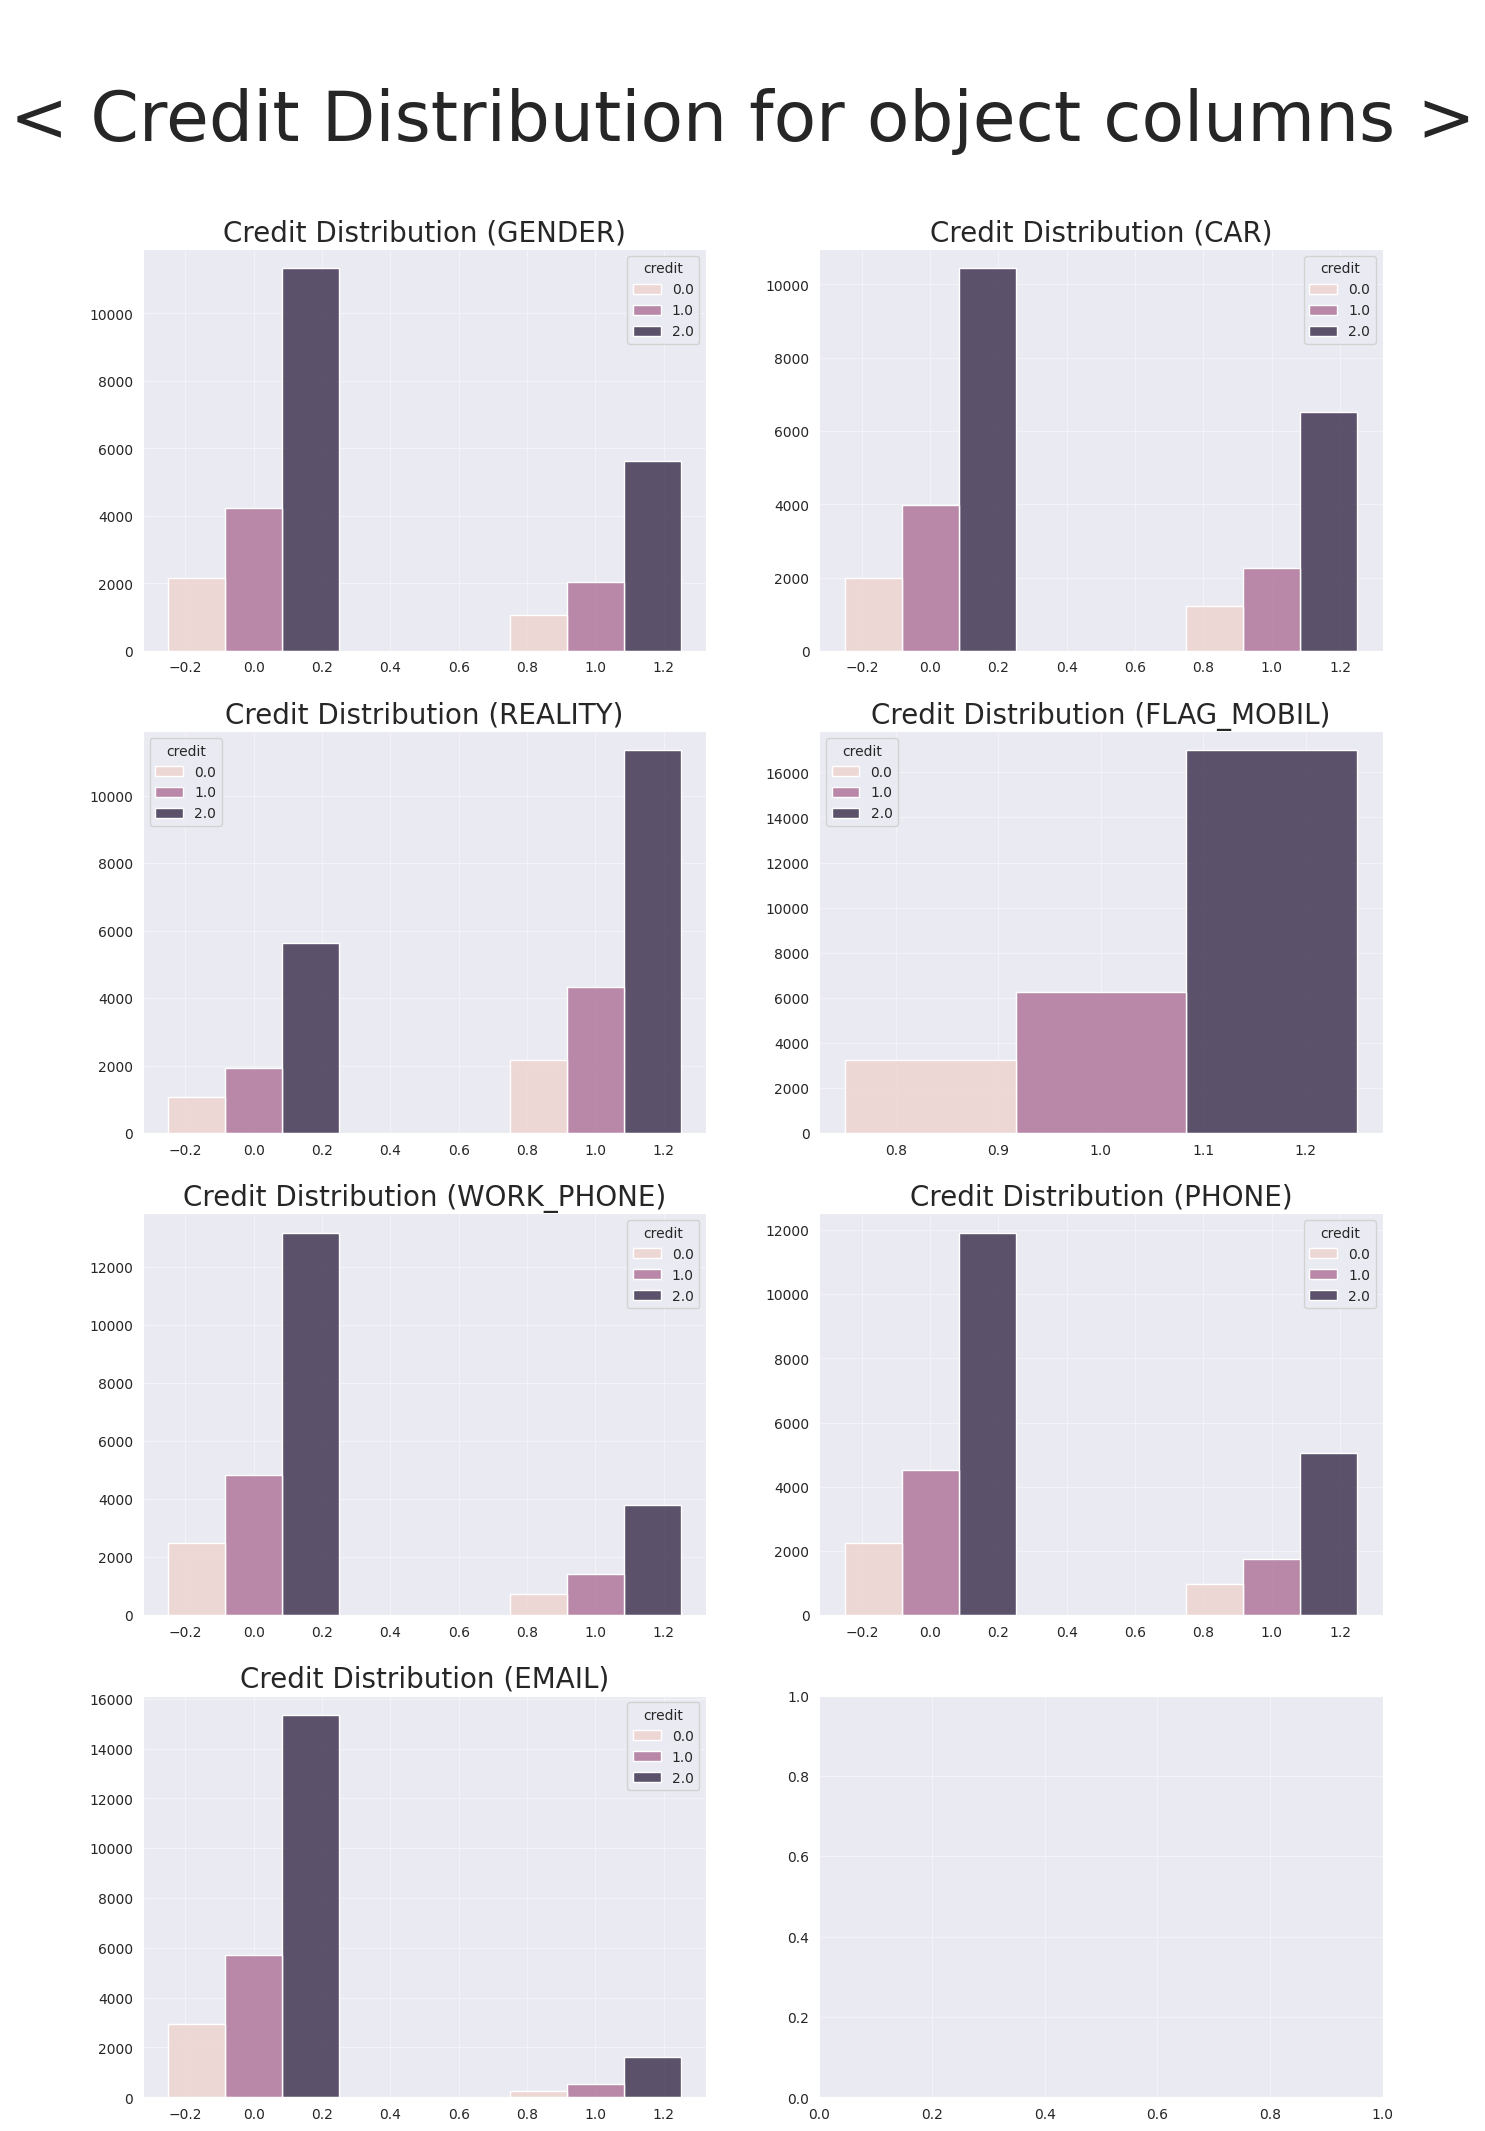

In [163]:
# page53

cat_EDA_cols = train_cat_bin.columns[:-1]
print(len(cat_EDA_cols))

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,24))
axes = axes.flatten()

for i, col in enumerate(cat_EDA_cols):
  ax = axes[i]

  sorted_col = train_cat[col].value_counts().sort_values(ascending=False).index

  train_cat[col] = pd.Categorical(train_cat[col], sorted_col)

  sns.histplot(data=train_cat_bin, x=col, binwidth=0.5, shrink=0.5, ax=ax, multiple='dodge', hue='credit', hue_order=[0,1,2])
  ax.set_title(f'Credit Distribution ({col.upper()})', fontsize=20)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.suptitle('\n< Credit Distribution for object columns >', fontsize=50)
plt.show()

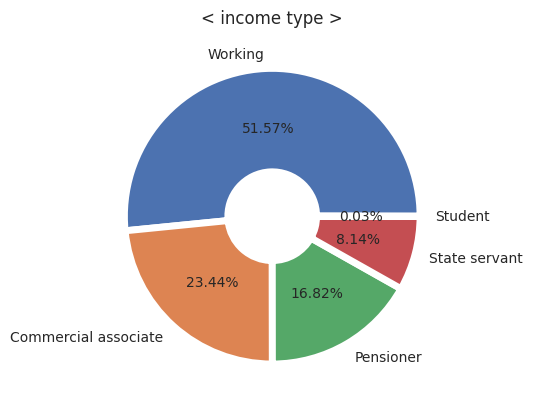

In [188]:
# page55

def remapped(columnname, df):
  org_name = le_arry[columnname].classes_
  unique = df[columnname].unique().categories
  #print(org_name, unique)

  re_name = []
  for x in unique:
    re_name.append(org_name[x])

  return re_name

#print(train_cat_over['income_type'].value_counts())

ratio = train_cat_over['income_type'].value_counts()
labels = remapped('income_type', train_cat_over)   #train_cat_over['income_type'].unique().categories => 이렇게 해야 이름으로 나온다
wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':5}

plt.title('< income type >')
plt.pie(x=ratio, labels=labels, autopct="%.2f%%", wedgeprops=wedgeprops)
plt.show()

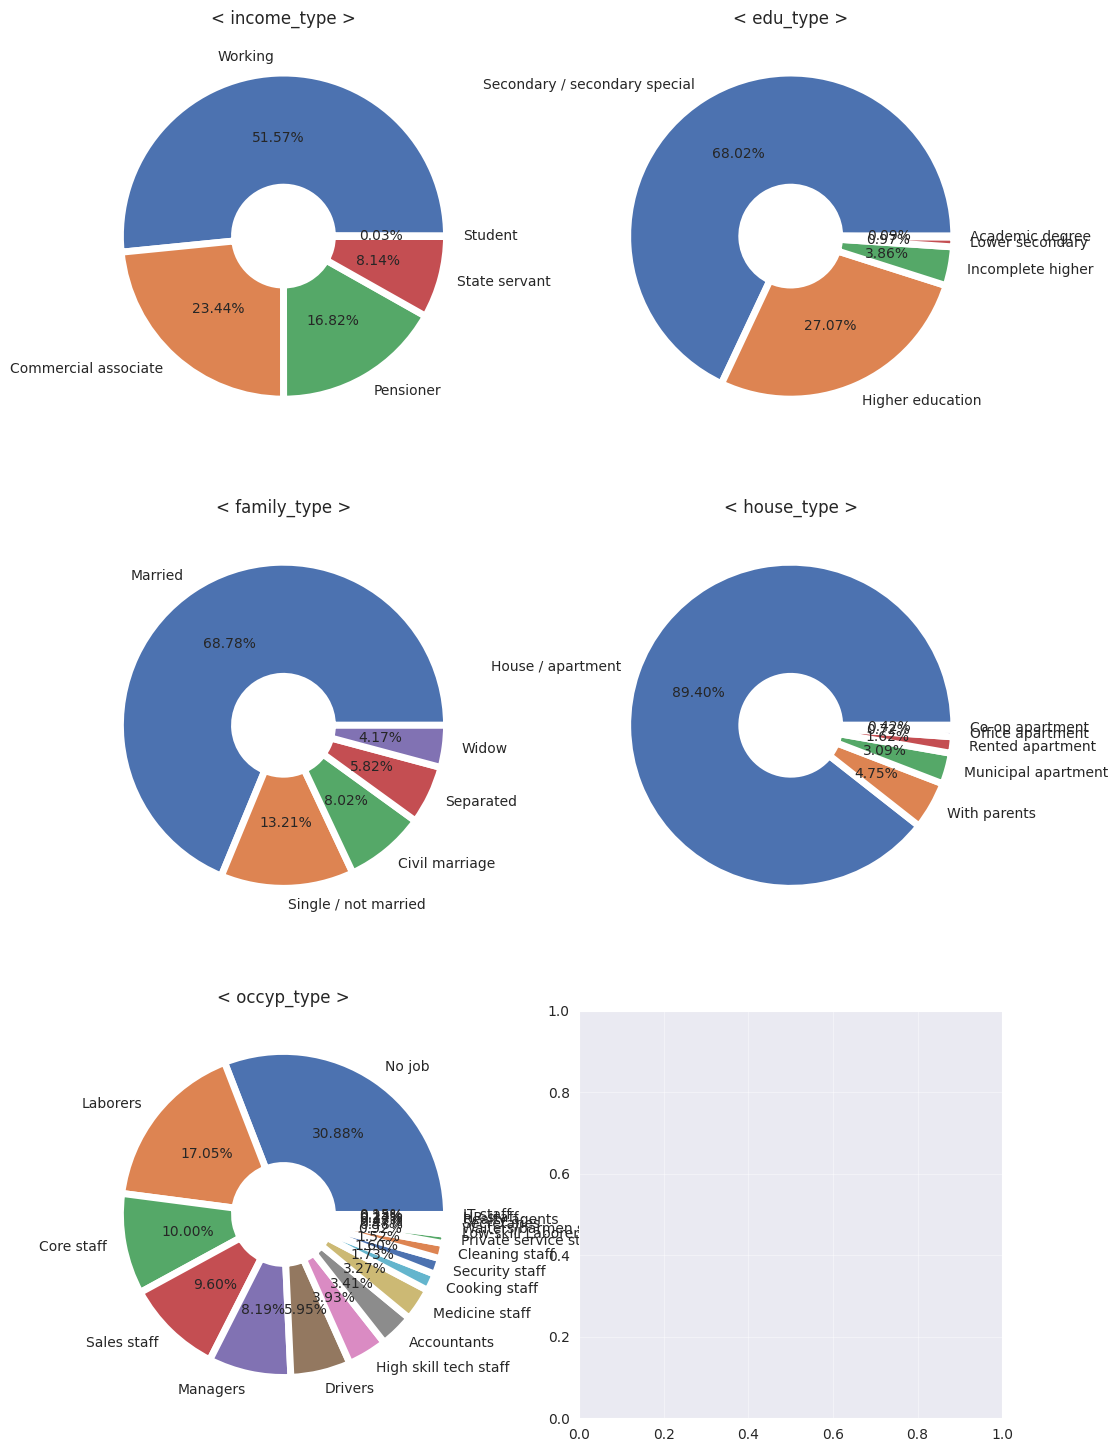

In [189]:
# page56

fig, axes = plt.subplots(3, 2, figsize=(12,18))
axes = axes.flatten()
columns = train_cat_over.columns[:-1]

for i, col in enumerate(columns):
  ratio = train_cat_over[col].value_counts()
  labels = remapped(col, train_cat_over)    #train_cat_over[col].unique().categories
  wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':5}

  axes[i].set_title(f'< {col} >')
  axes[i].pie(x=ratio, labels=labels, autopct="%.2f%%", wedgeprops=wedgeprops)

plt.show()

sorted_col= CategoricalIndex([12, 8, 3, 15, 10, 4, 6, 0, 11, 2, 17, 1, 13, 9, 18, 16, 14,
                  5, 7],
                 categories=[12, 8, 3, 15, ..., 16, 14, 5, 7], ordered=False, dtype='category', name='occyp_type')


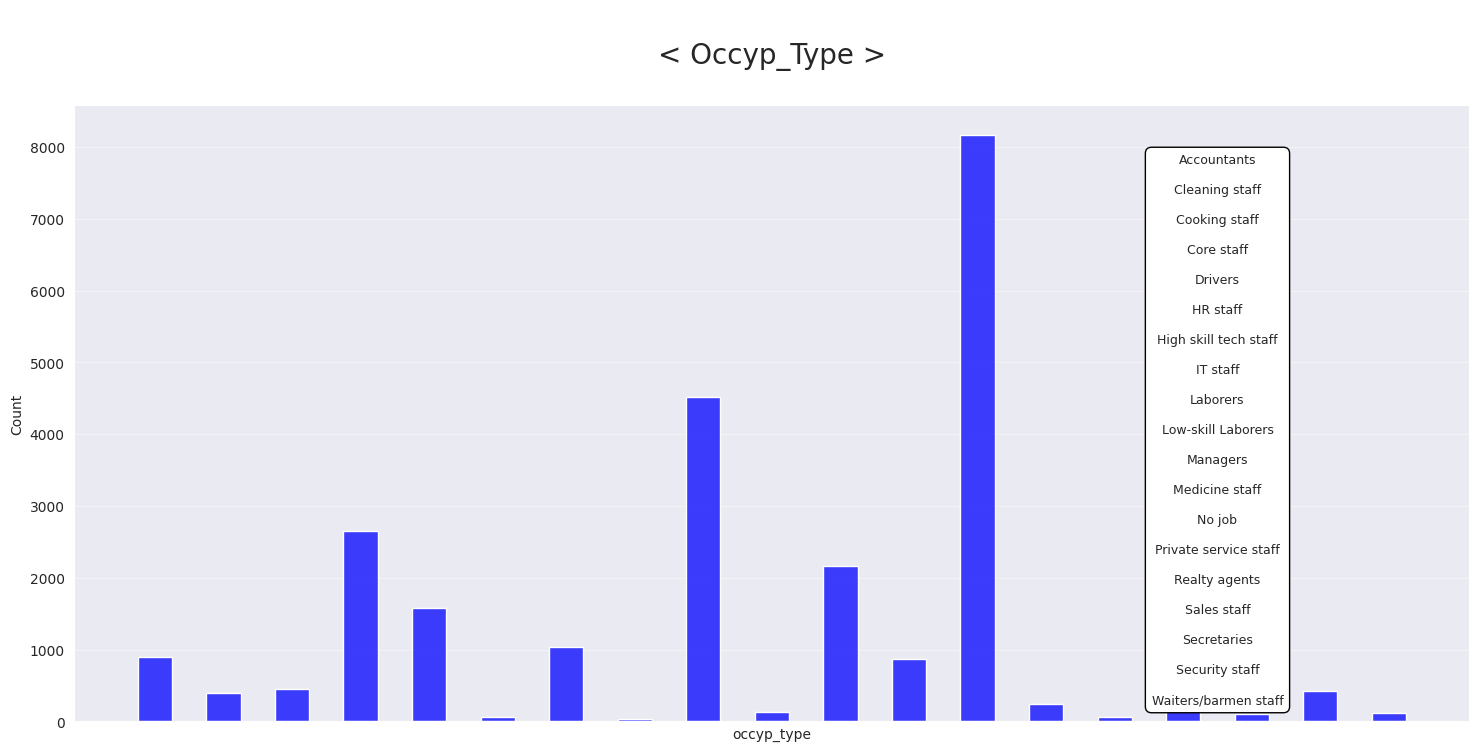

In [192]:
# page58

sorted_col = train_cat['occyp_type'].value_counts().index
print('sorted_col=',sorted_col)

plt.figure(figsize=(18,8))

sns.histplot(data=train_cat_over, x='occyp_type', binwidth=0.5, shrink=0.5, color='blue')
plt.xticks([])

plt.text(x=len(sorted_col)//2 + 6.5, y=250, s='\n\n'.join(le_arry['occyp_type'].classes_), fontsize=9, ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.title('\n< Occyp_Type >', fontsize=20, pad=30)
plt.show()


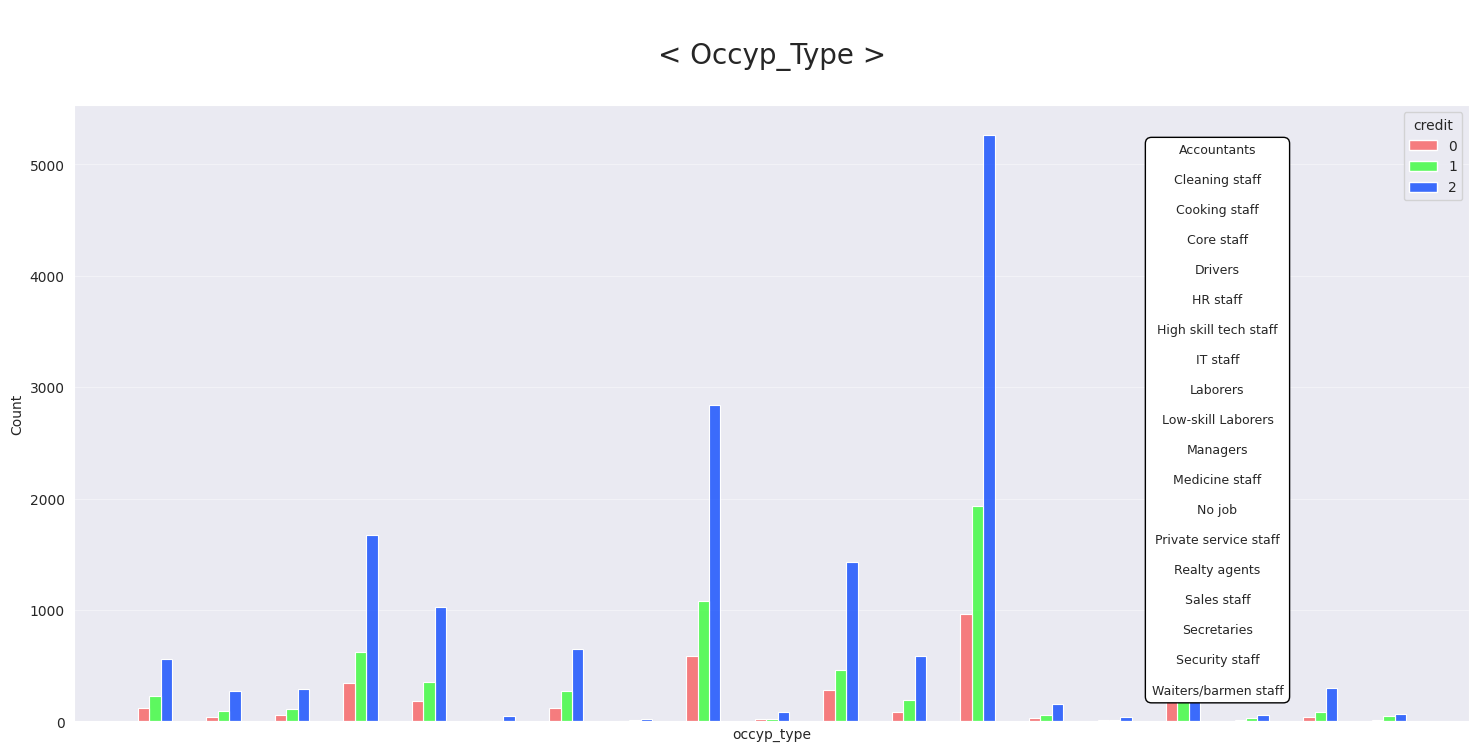

In [193]:
# page60

plt.figure(figsize=(18,8))

sns.histplot(data=train_cat_over, x='occyp_type', hue='credit', binwidth=0.5, shrink=0.5, palette=color, multiple='dodge', hue_order=[0,1,2])
plt.xticks([])

plt.text(x=len(sorted_col)//2 + 6.5, y=250, s='\n\n'.join(le_arry['occyp_type'].classes_), fontsize=9, ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.title('\n< Occyp_Type >', fontsize=20, pad=30)
plt.show()


In [ ]:
# page 62

!pip install tabulate

In [194]:
# page62

from tabulate import tabulate

output_table = []

occyps = train_cat_over['occyp_type'].value_counts().index

dfs = [train_cat_over[train_cat_over['occyp_type'] == occyps[i]] for i in range(len(occyps))]

le_classes = le_arry['occyp_type'].classes_

for i, df in enumerate(dfs):
  output_table.append([le_classes[occyps[i]], f'{round((len(df)/len(train_cat_over))*100, 2)}%',
                       round(df['credit'].value_counts(normalize=True) * 100, 2).astype("str") + '%'])

print(tabulate(output_table, headers=['Occyp_type', 'Proportion', 'Credit Distribution'], tablefmt='grid'))


+-----------------------+--------------+---------------------------------+
| Occyp_type            | Proportion   | Credit Distribution             |
+=======================+==============+=================================+
| No job                | 30.88%       | credit                          |
|                       |              | 2.0    64.45%                   |
|                       |              | 1.0    23.72%                   |
|                       |              | 0.0    11.83%                   |
|                       |              | Name: proportion, dtype: object |
+-----------------------+--------------+---------------------------------+
| Laborers              | 17.05%       | credit                          |
|                       |              | 2.0    63.03%                   |
|                       |              | 1.0    23.98%                   |
|                       |              | 0.0    12.99%                   |
|                       |

In [ ]:
# page65

test = test.drop(columns=['index','FLAG_MOBIL'])

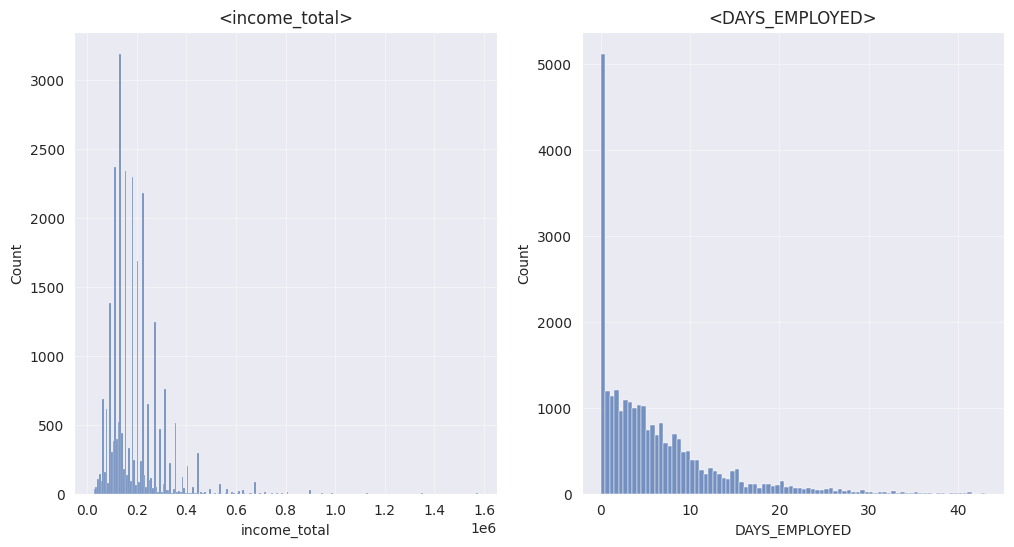

In [ ]:
# page66

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes = axes.flatten()
columns = ['income_total','DAYS_EMPLOYED']

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f'<{col}>')

plt.show()

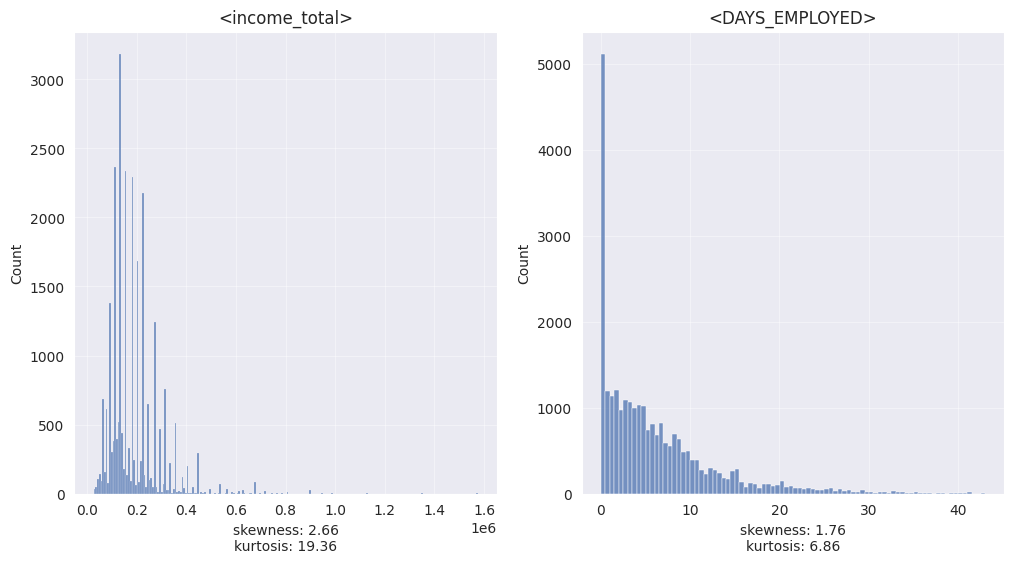

In [ ]:
# page69

from scipy.stats import skew,kurtosis

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes = axes.flatten()
columns = ['income_total','DAYS_EMPLOYED']

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f'<{col}>')

  skewness = skew(train[col])
  kurto = kurtosis(train[col], fisher=False)
  axes[i].set_xlabel(f'skewness: {round(skewness, 2)}\nkurtosis: {round(kurto,2)}')

plt.show()

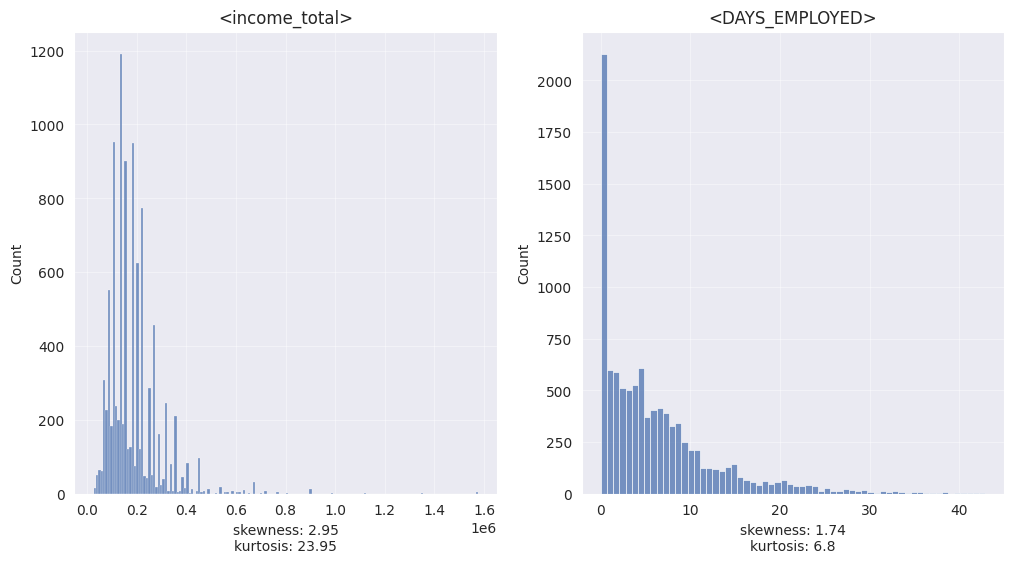

In [ ]:
# page71

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes = axes.flatten()
columns = ['income_total','DAYS_EMPLOYED']

for i, col in enumerate(columns):
  sns.histplot(data=test, x=col, ax=axes[i])
  axes[i].set_title(f'<{col}>')

  skewness = skew(test[col])
  kurto = kurtosis(test[col], fisher=False)
  axes[i].set_xlabel(f'skewness: {round(skewness, 2)}\nkurtosis: {round(kurto,2)}')

plt.show()

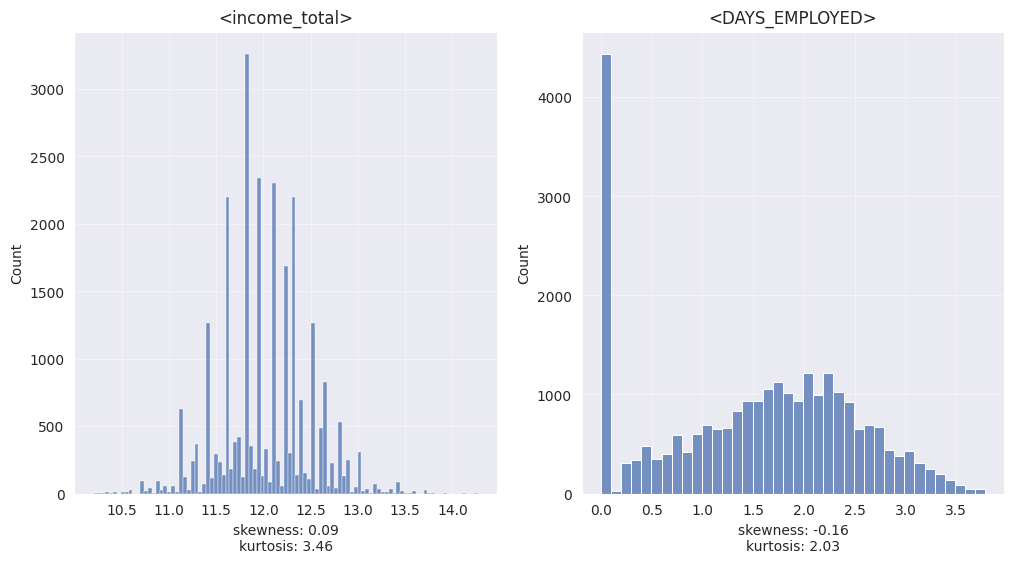

In [ ]:
# page73

import numpy as np

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes = axes.flatten()
columns = ['income_total','DAYS_EMPLOYED']

for i, col in enumerate(columns):
  if i == 1:
    data = np.log(train[col]+1)
  else:
    data = np.log(train[col])

  sns.histplot(data=data, ax=axes[i])
  axes[i].set_title(f'<{col}>')

  skewness = skew(data)
  kurto = kurtosis(data, fisher=False)
  axes[i].set_xlabel(f'skewness: {round(skewness, 2)}\nkurtosis: {round(kurto,2)}')

plt.show()

In [ ]:
# page75

test['income_total'] = np.log(test['income_total'])
test['DAYS_EMPLOYED'] = np.log(test['DAYS_EMPLOYED']+1)

In [ ]:
# page76

test['child_nume_over_five'] = test['child_num'] > 5

In [ ]:
# page77

print(train.drop(columns='begin_month').duplicated().sum())

print(test.drop(columns='begin_month').duplicated().sum())


0
1114


In [ ]:
# page78

train_drop = train.drop(columns='begin_month')
duplicated_num = train_drop.groupby(train_drop.columns.tolist(), as_index=False).transform('size')
train['duplicated_num'] = duplicated_num

print(train.head(5))

   index gender car reality  child_num  income_total income_type edu_type  \
0      0      0   0       0          0      202500.0           0        1   
1      1      0   0       1          1      247500.0           0        4   
2      2      1   1       1          0      450000.0           4        1   
3      3      0   0       1          0      202500.0           0        4   
4      4      0   1       1          0      157500.0           2        1   

  family_type house_type  ...  DAYS_EMPLOYED  FLAG_MOBIL work_phone phone  \
0           1          2  ...      12.901370           1          0     0   
1           0          1  ...       4.219178           1          0     0   
2           1          1  ...      12.147945           1          0     1   
3           1          1  ...       5.731507           1          0     1   
4           1          1  ...       5.767123           1          0     0   

  email occyp_type family_size  begin_month  credit  duplicated_num  
0   

In [ ]:
# page79

test_drop = test.drop(columns='begin_month')
duplicated_num = test_drop.groupby(test_drop.columns.tolist(), as_index=False).transform('size')
test['duplicated_num'] = duplicated_num

print(test.head(5))

   gender  car  reality  child_num  income_total  income_type  edu_type  \
0       1    1        0          0      112500.0            1         4   
1       0    0        1          0      135000.0            2         1   
2       0    0        1          0       69372.0            4         4   
3       1    1        0          0      112500.0            0         4   
4       0    1        1          0      225000.0            2         1   

   family_type  house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  \
0            0           1   60.246575       0.000000           0      1   
1            1           1   51.956164      23.756164           0      1   
2            1           1   43.526027       0.594521           1      1   
3            1           1   52.794521       6.934247           1      0   
4            1           1   48.827397      25.712329           1      0   

   email  occyp_type  family_size  begin_month  child_nume_over_five  \
0      0          12

In [195]:
# page80

train['before_employed'] = train['DAYS_BIRTH'] - train['DAYS_EMPLOYED']
test['before_employed'] = test['DAYS_BIRTH'] - test['DAYS_EMPLOYED']

output_table = []

types = train['house_type'].value_counts().index

dfs = [train[train['house_type'] == types[i]] for i in range(len(types))]

le_classes = le_arry['house_type'].classes_

for i, df in enumerate(dfs):
  output_table.append([le_classes[types[i]], f'{round((len(df)/len(train))*100, 2)}%',
                       round(df['credit'].value_counts(normalize=True) * 100, 2).astype("str") + '%'])

print(tabulate(output_table, headers=['house_type', 'Proportion', 'Credit Distribution'], tablefmt='grid'))


+---------------------+--------------+---------------------------------+
| house_type          | Proportion   | Credit Distribution             |
+=====================+==============+=================================+
| House / apartment   | 89.4%        | credit                          |
|                     |              | 2.0    64.31%                   |
|                     |              | 1.0    23.54%                   |
|                     |              | 0.0    12.15%                   |
|                     |              | Name: proportion, dtype: object |
+---------------------+--------------+---------------------------------+
| With parents        | 4.75%        | credit                          |
|                     |              | 2.0    63.09%                   |
|                     |              | 1.0     24.9%                   |
|                     |              | 0.0    12.01%                   |
|                     |              | Name: propor

In [199]:
# page82

le_classes = le_arry['house_type'].classes_
#print(list(le_classes).index('Rented apartment'))
col_idx = list(le_classes).index('Rented apartment')

train['house_owner'] = (train['house_type'] != col_idx)
test['house_owner'] = (test['house_type'] != col_idx)


In [200]:
# page85

train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)

In [218]:
# page90

train = pd.read_csv('train_processed.csv')
test = pd.read_csv('test_processed.csv')

train = train.drop(columns='index')
test = test.drop(columns='index')

print(train['credit'].value_counts())


credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64


In [232]:
# page91

X = train.drop(columns='credit')
y = train['credit']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [233]:
# page92

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, log_loss

pred_1 = dt.predict(X_valid)
valid_cm_1 = confusion_matrix(y_valid, pred_1)
valid_acc_1 = accuracy_score(y_valid, pred_1)
valid_recall_1 = recall_score(y_valid, pred_1, average='weighted')
valid_precision_1 = precision_score(y_valid, pred_1, average='weighted')
valid_f1_1 = f1_score(y_valid, pred_1, average='weighted')

print("Confusion matrix:\n", valid_cm_1)
print("\n")
print("Accuracy:", round(valid_acc_1*100,2))
print("Recall:", round(valid_recall_1*100,2))
print("Precision:", round(valid_precision_1*100,2))
print("F1:", round(valid_f1_1,4))


Confusion matrix:
 [[ 208  151  285]
 [ 160  599  495]
 [ 374  570 2450]]


Accuracy: 61.55
Recall: 61.55
Precision: 62.81
F1: 0.6212


In [234]:
# page93

from sklearn.metrics import classification_report

report = classification_report(y_valid, pred_1)
print(report)

              precision    recall  f1-score   support

         0.0       0.28      0.32      0.30       644
         1.0       0.45      0.48      0.47      1254
         2.0       0.76      0.72      0.74      3394

    accuracy                           0.62      5292
   macro avg       0.50      0.51      0.50      5292
weighted avg       0.63      0.62      0.62      5292



In [235]:
# page94

feature_importances_1 = pd.Series(dt.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
feature_importances_1 = feature_importances_1.head(20)

print(feature_importances_1)

begin_month        0.362457
DAYS_BIRTH         0.115408
before_employed    0.106941
income_total       0.099040
DAYS_EMPLOYED      0.092003
occyp_type         0.048964
family_type        0.025691
family_size        0.017587
phone              0.016827
gender             0.015279
edu_type           0.014872
reality            0.014407
income_type        0.014051
car                0.013989
work_phone         0.012205
house_type         0.010375
child_num          0.009515
email              0.007994
house_owner        0.002395
FLAG_MOBIL         0.000000
dtype: float64


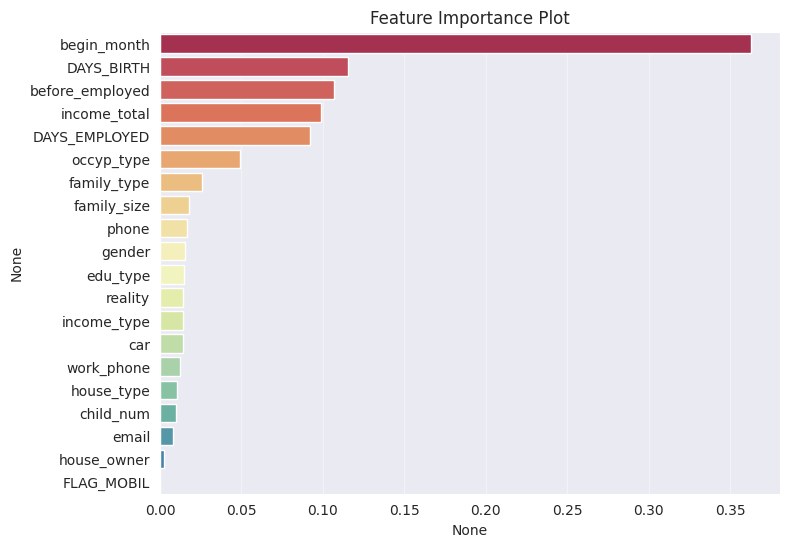

In [236]:
# page95

%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance Plot')
sns.barplot(x=feature_importances_1, y=feature_importances_1.index, palette='Spectral')
plt.show()

In [227]:
# page96

prob_1 = dt.predict_proba(X_valid)

log_loss_1 = log_loss(y_valid, prob_1)
print('Log Loss:', round(log_loss_1,4))

Log Loss: 13.3513


In [237]:
# page98

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
pred_2 = rf.predict(X_valid)

valid_cm_2 = confusion_matrix(y_valid, pred_2)
valid_acc_2 = accuracy_score(y_valid, pred_2)
valid_recall_2 = recall_score(y_valid, pred_2, average='weighted')
valid_precision_2 = precision_score(y_valid, pred_2, average='weighted')
valid_f1_2 = f1_score(y_valid, pred_2, average='weighted')

print("Confusion matrix:\n", valid_cm_2)
print("\n")
print("Accuracy:", round(valid_acc_2*100,2))
print("Recall:", round(valid_recall_2*100,2))
print("Precision:", round(valid_precision_2*100,2))
print("F1:", round(valid_f1_2,4))


Confusion matrix:
 [[ 185  115  344]
 [  67  624  563]
 [ 175  305 2914]]


Accuracy: 70.35
Recall: 70.35
Precision: 68.35
F1: 0.6888


In [238]:
# page100

feature_importances_2 = pd.Series(rf.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
feature_importances_2 = feature_importances_2.head(20)

print(feature_importances_2)

begin_month        0.343235
DAYS_BIRTH         0.113708
before_employed    0.113323
DAYS_EMPLOYED      0.089938
income_total       0.089701
occyp_type         0.050694
family_type        0.023580
family_size        0.021034
edu_type           0.018843
income_type        0.018623
phone              0.016677
reality            0.016575
car                0.016406
child_num          0.015483
gender             0.015350
work_phone         0.012934
house_type         0.012495
email              0.009252
house_owner        0.002150
FLAG_MOBIL         0.000000
dtype: float64


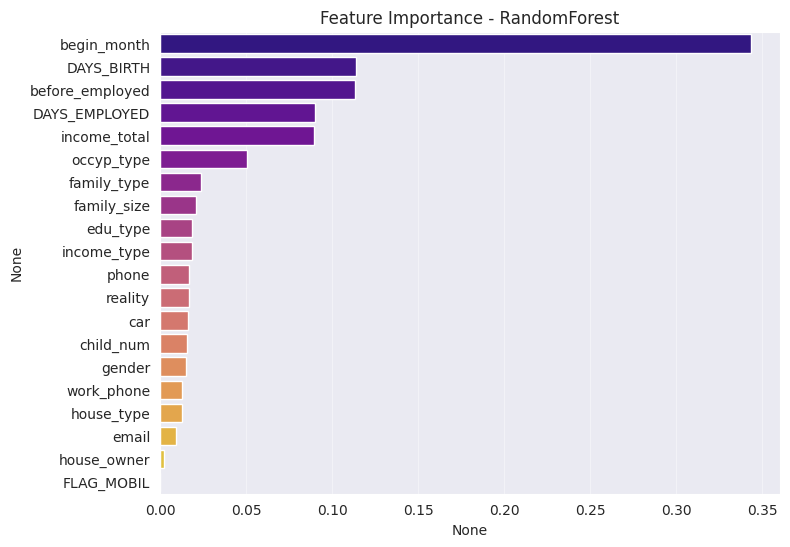

In [239]:
# page101

%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance - RandomForest')
sns.barplot(x=feature_importances_2, y=feature_importances_2.index, palette='plasma')
plt.show()

In [243]:


prob_2 = rf.predict_proba(X_valid)

log_loss_2 = log_loss(y_valid, prob_2)
print('Log Loss:', round(log_loss_2,4))

Log Loss: 0.9508


In [240]:
# page102

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)
pred_3 = xgb.predict(X_valid)

valid_cm_3 = confusion_matrix(y_valid, pred_3)
valid_acc_3 = accuracy_score(y_valid, pred_3)
valid_recall_3 = recall_score(y_valid, pred_3, average='weighted')
valid_precision_3 = precision_score(y_valid, pred_3, average='weighted')
valid_f1_3 = f1_score(y_valid, pred_3, average='weighted')

print("Confusion matrix:\n", valid_cm_3)
print("\n")
print("Accuracy:", round(valid_acc_3*100,2))
print("Recall:", round(valid_recall_3*100,2))
print("Precision:", round(valid_precision_3*100,2))
print("F1:", round(valid_f1_3,4))


Confusion matrix:
 [[  70   80  494]
 [  22  409  823]
 [  31   72 3291]]


Accuracy: 71.24
Recall: 71.24
Precision: 70.01
F1: 0.6565


begin_month        0.116841
work_phone         0.058343
DAYS_EMPLOYED      0.056851
before_employed    0.054151
house_owner        0.052258
DAYS_BIRTH         0.051653
email              0.051381
family_size        0.050590
phone              0.049631
family_type        0.049199
edu_type           0.049051
house_type         0.047087
income_type        0.046858
income_total       0.046826
occyp_type         0.046721
child_num          0.045416
gender             0.043145
car                0.042840
reality            0.041158
FLAG_MOBIL         0.000000
dtype: float32


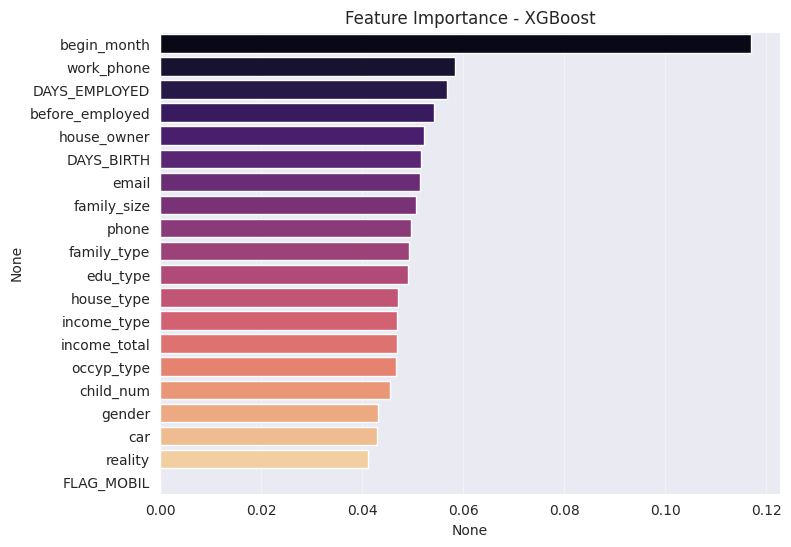

In [241]:
# page104

feature_importances_3 = pd.Series(xgb.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
feature_importances_3 = feature_importances_3.head(20)

print(feature_importances_3)

%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance - XGBoost')
sns.barplot(x=feature_importances_3, y=feature_importances_3.index, palette='magma')
plt.show()

In [244]:
# page105

prob_3 = xgb.predict_proba(X_valid)

log_loss_3 = log_loss(y_valid, prob_3)
print('Log Loss:', round(log_loss_3,4))

Log Loss: 0.7482


In [245]:
# page107

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

lgbm.fit(X_train, y_train)
pred_4 = lgbm.predict(X_valid)

valid_cm_4 = confusion_matrix(y_valid, pred_4)
valid_acc_4 = accuracy_score(y_valid, pred_4)
valid_recall_4 = recall_score(y_valid, pred_4, average='weighted')
valid_precision_4 = precision_score(y_valid, pred_4, average='weighted')
valid_f1_4 = f1_score(y_valid, pred_4, average='weighted')

print("Confusion matrix:\n", valid_cm_4)
print("\n")
print("Accuracy:", round(valid_acc_4*100,2))
print("Recall:", round(valid_recall_4*100,2))
print("Precision:", round(valid_precision_4*100,2))
print("F1:", round(valid_f1_4,4))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 19
[LightGBM] [Info] Start training from score -2.105335
[LightGBM] [Info] Start training from score -1.440314
[LightGBM] [Info] Start training from score -0.444193
Confusion matrix:
 [[  31   87  526]
 [   7  351  896]
 [  12   38 3344]]


Accuracy: 70.41
Recall: 70.41
Precision: 70.02
F1: 0.6327


DAYS_BIRTH         1418
income_total       1375
DAYS_EMPLOYED      1363
before_employed    1225
begin_month         984
occyp_type          639
family_type         265
edu_type            237
income_type         183
family_size         176
car                 167
reality             163
phone               163
work_phone          152
child_num           135
gender              127
house_type          126
email                66
house_owner          36
FLAG_MOBIL            0
dtype: int32


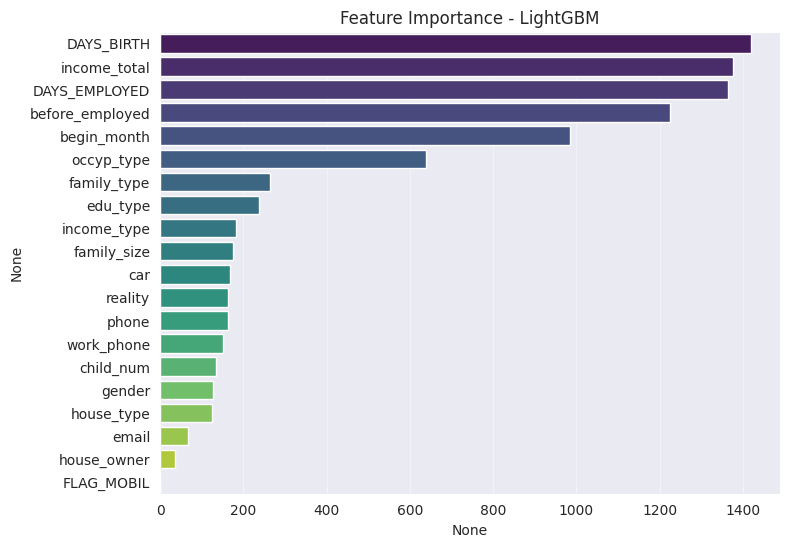

In [246]:
# page109

feature_importances_4 = pd.Series(lgbm.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
feature_importances_4 = feature_importances_4.head(20)

print(feature_importances_4)

%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance - LightGBM')
sns.barplot(x=feature_importances_4, y=feature_importances_4.index, palette='viridis')
plt.show()

In [247]:
# page110

prob_4 = lgbm.predict_proba(X_valid)

log_loss_4 = log_loss(y_valid, prob_4)
print('Log Loss:', round(log_loss_4,4))

Log Loss: 0.7497


In [248]:
# page111

print("F1 - DT:", round(valid_f1_1,4))
print("F1 - RF:", round(valid_f1_2,4))
print("F1 - XG:", round(valid_f1_3,4))
print("F1 - LG:", round(valid_f1_4,4))

F1 - DT: 0.6212
F1 - RF: 0.6888
F1 - XG: 0.6565
F1 - LG: 0.6327


In [249]:
# page115 - 전체 45분정도 소요됨

from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_estimators':[100,300,1000],
    'max_features':['sqrt','log2'],
    'max_depth':[3,5,10],
    'criterion':['gini','entropy'],
    'min_samples_split':[2,5,20]
}

grid_rf = GridSearchCV(rf, param_grid=params_grid, cv=3, verbose=2, scoring='neg_log_loss')

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   3.8s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=1000; total time=  11.7s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=1000; total time=  11.3s
[CV] END criter

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [100, 300, 1000]},
             scoring='neg_log_loss', verbose=2)

In [251]:
# page117

grid_rf_cv = grid_rf.cv_results_
grid_result = pd.DataFrame(grid_rf_cv)
grid_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.279670,0.257066,0.070048,0.020674,gini,3,sqrt,2,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.836008,-0.835328,-0.832807,-0.834715,0.001377,75
1,2.551849,0.828537,0.094301,0.008661,gini,3,sqrt,2,300,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.837043,-0.837137,-0.834840,-0.836340,0.001061,105
2,11.332869,0.284079,0.341594,0.061707,gini,3,sqrt,2,1000,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.836161,-0.835728,-0.834322,-0.835403,0.000785,93
3,0.809049,0.084434,0.048039,0.011226,gini,3,sqrt,5,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.835789,-0.835318,-0.833000,-0.834702,0.001219,73
4,3.492920,1.503190,0.130326,0.018972,gini,3,sqrt,5,300,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",-0.836938,-0.837140,-0.835243,-0.836440,0.000851,107


In [252]:
# page118

grid_result = grid_result.sort_values('rank_test_score')
grid_result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
101,20.416719,0.872217,0.731609,0.107211,entropy,10,log2,2,1000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.784825,-0.783385,-0.784689,-0.784300,0.000649,1
92,19.444327,0.391831,0.658578,0.012150,entropy,10,sqrt,2,1000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.784825,-0.783385,-0.784689,-0.784300,0.000649,1
91,6.050038,0.466608,0.231858,0.047723,entropy,10,sqrt,2,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.785332,-0.783986,-0.785381,-0.784900,0.000646,3
100,6.211518,0.514199,0.266000,0.073766,entropy,10,log2,2,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.785332,-0.783986,-0.785381,-0.784900,0.000646,3
103,5.749625,0.263822,0.234268,0.043553,entropy,10,log2,5,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.786045,-0.784077,-0.784922,-0.785015,0.000806,5
94,5.701912,0.460268,0.194319,0.000645,entropy,10,sqrt,5,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.786045,-0.784077,-0.784922,-0.785015,0.000806,5
95,20.029951,0.951240,0.647753,0.031386,entropy,10,sqrt,5,1000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.785630,-0.784063,-0.785627,-0.785107,0.000738,7
104,20.199273,0.904041,0.697161,0.016473,entropy,10,log2,5,1000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.785630,-0.784063,-0.785627,-0.785107,0.000738,7
102,1.943603,0.190321,0.072811,0.002524,entropy,10,log2,5,100,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.786089,-0.785023,-0.784547,-0.785220,0.000645,9
93,2.106470,0.316054,0.087630,0.014045,entropy,10,sqrt,5,100,"{'criterion': 'entropy', 'max_depth': 10, 'max...",-0.786089,-0.785023,-0.784547,-0.785220,0.000645,9


In [255]:
# page119

grid_best_params = grid_rf.best_params_
grid_best_score = grid_rf.best_score_

print(f"Best params:{grid_best_params}\nscore:{round(-grid_best_score, 4)}")

Best params:{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}
score:0.7843


In [256]:
# page120

rf_tune1 = grid_rf.best_estimator_

rf_tune1.fit(X_train, y_train)

y_prob1 = rf_tune1.predict_proba(X_valid)
log_loss_grid = log_loss(y_valid, y_prob1)

print(f"Base RF model:{round(log_loss_2, 4)}")
print(f"Best GS model:{round(log_loss_grid, 4)}")

Base RF model:0.9508
Best GS model:0.7803


In [260]:
# page121 - 대략 30분

from sklearn.model_selection import RandomizedSearchCV

params_distrib = {
    'n_estimators':np.arange(50,800,10),
    'max_features':['sqrt','log2',0.2,0.5,0.8],
    'max_depth':np.arange(5,100,3),
    'criterion':['gini','entropy'],
    'min_samples_split':np.arange(2,10,1)
}

random_rf = RandomizedSearchCV(rf, param_distributions=params_distrib, cv=3, verbose=3, scoring='neg_log_loss', n_iter=30)

random_rf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=600;, score=-0.725 total time=  27.9s
[CV 2/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=600;, score=-0.723 total time=  20.8s
[CV 3/3] END criterion=gini, max_depth=50, max_features=log2, min_samples_split=6, n_estimators=600;, score=-0.730 total time=  20.6s
[CV 1/3] END criterion=gini, max_depth=47, max_features=0.5, min_samples_split=9, n_estimators=650;, score=-0.737 total time=  48.5s
[CV 2/3] END criterion=gini, max_depth=47, max_features=0.5, min_samples_split=9, n_estimators=650;, score=-0.734 total time=  47.6s
[CV 3/3] END criterion=gini, max_depth=47, max_features=0.5, min_samples_split=9, n_estimators=650;, score=-0.742 total time=  50.3s
[CV 1/3] END criterion=gini, max_depth=62, max_features=0.2, min_samples_split=3, n_estimators=280;, score=-0.745 total time=   9.7s
[CV 2

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53,
       56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98]),
                                        'max_features': ['sqrt', 'log2', 0.2,
                                                         0.5, 0.8],
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
       310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430,
       440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560,
       570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690,
       700, 710, 720, 730, 740, 750, 760, 770, 780, 790])},
                   scoring='neg_log_loss', verbose=3)

In [261]:
# page123

random_rf_cv = random_rf.cv_results_
random_result = pd.DataFrame(random_rf_cv)
random_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,21.892609,3.468520,1.206128,0.180734,600,6,log2,50,gini,"{'n_estimators': 600, 'min_samples_split': 6, ...",-0.724969,-0.722600,-0.729587,-0.725718,0.002901,5
1,47.537734,0.827967,1.268924,0.314824,650,9,0.5,47,gini,"{'n_estimators': 650, 'min_samples_split': 9, ...",-0.736501,-0.733836,-0.742437,-0.737591,0.003595,14
2,9.673266,0.418481,0.631346,0.043787,280,3,0.2,62,gini,"{'n_estimators': 280, 'min_samples_split': 3, ...",-0.744945,-0.744298,-0.752607,-0.747284,0.003774,22
3,7.229153,0.514343,0.416714,0.049183,230,8,0.2,41,gini,"{'n_estimators': 230, 'min_samples_split': 8, ...",-0.726918,-0.724598,-0.731553,-0.727690,0.002891,7
4,9.720591,0.438099,0.212210,0.039881,120,9,0.5,59,entropy,"{'n_estimators': 120, 'min_samples_split': 9, ...",-0.740283,-0.735442,-0.742401,-0.739375,0.002913,17


In [262]:
# page124

random_result = random_result.sort_values('rank_test_score')
random_result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
29,24.432925,0.057716,1.173957,0.097810,610,6,log2,74,entropy,"{'n_estimators': 610, 'min_samples_split': 6, ...",-0.724274,-0.721345,-0.728588,-0.724736,0.002975,1
17,24.632340,0.285490,2.045015,0.147826,750,6,0.2,32,gini,"{'n_estimators': 750, 'min_samples_split': 6, ...",-0.723575,-0.722118,-0.728591,-0.724761,0.002772,2
14,15.349399,0.221224,0.741274,0.107692,420,9,0.2,86,entropy,"{'n_estimators': 420, 'min_samples_split': 9, ...",-0.724748,-0.722388,-0.727879,-0.725005,0.002249,3
28,18.562810,1.088290,1.024386,0.053550,570,8,log2,74,gini,"{'n_estimators': 570, 'min_samples_split': 8, ...",-0.725103,-0.722964,-0.728924,-0.725664,0.002465,4
0,21.892609,3.468520,1.206128,0.180734,600,6,log2,50,gini,"{'n_estimators': 600, 'min_samples_split': 6, ...",-0.724969,-0.722600,-0.729587,-0.725718,0.002901,5
10,11.377378,0.174470,0.920097,0.086253,380,9,log2,47,gini,"{'n_estimators': 380, 'min_samples_split': 9, ...",-0.727269,-0.724772,-0.729871,-0.727304,0.002082,6
3,7.229153,0.514343,0.416714,0.049183,230,8,0.2,41,gini,"{'n_estimators': 230, 'min_samples_split': 8, ...",-0.726918,-0.724598,-0.731553,-0.727690,0.002891,7
9,20.624536,0.584378,1.315451,0.144447,610,5,0.2,83,gini,"{'n_estimators': 610, 'min_samples_split': 5, ...",-0.727241,-0.725247,-0.731452,-0.727980,0.002587,8
24,10.471985,0.520808,0.429506,0.011522,290,7,0.2,20,entropy,"{'n_estimators': 290, 'min_samples_split': 7, ...",-0.728606,-0.726905,-0.734771,-0.730094,0.003379,9
25,29.237095,0.285999,1.458473,0.124245,710,4,0.2,80,entropy,"{'n_estimators': 710, 'min_samples_split': 4, ...",-0.732633,-0.729334,-0.736800,-0.732922,0.003055,10


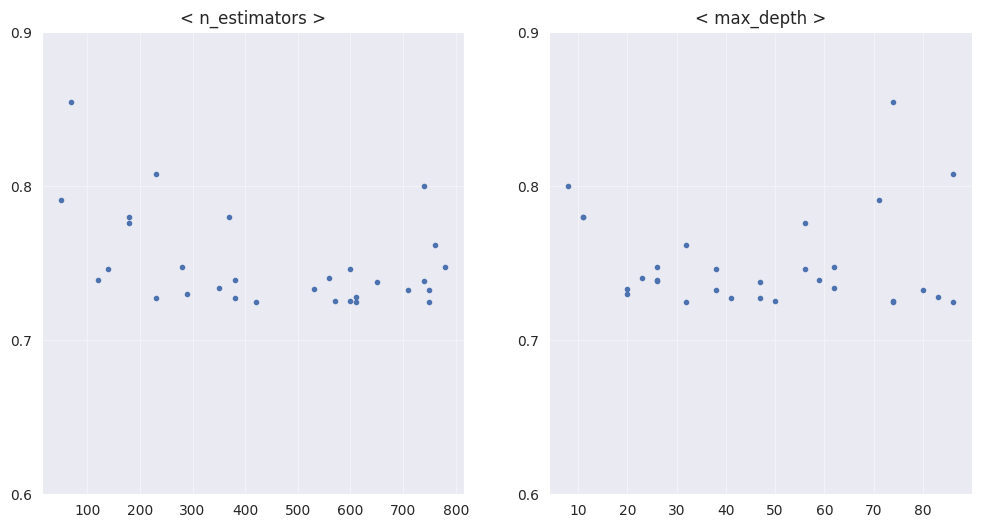

In [266]:
# page125

fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].scatter(random_result['param_n_estimators'], -random_result['mean_test_score'], marker='.')
ax[0].set_title("< n_estimators >")
ax[0].set_yticks([0.6,0.7,0.8,0.9])
ax[1].scatter(random_result['param_max_depth'], -random_result['mean_test_score'], marker='.')
ax[1].set_title("< max_depth >")
ax[1].set_yticks([0.6,0.7,0.8,0.9])

plt.show()

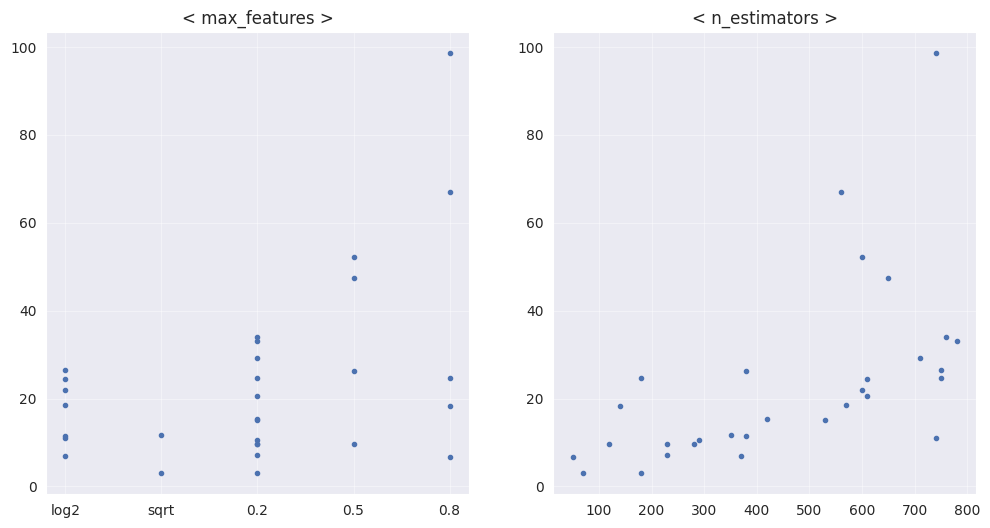

In [269]:
# page126

fig, ax = plt.subplots(1,2,figsize=(12,6))

max_features = random_result['param_max_features'].map({'log2':0, "sqrt":1, 0.2:2, 0.5:3, 0.8:4})

ax[0].scatter(max_features, random_result['mean_fit_time'], marker='.')
ax[0].set_title("< max_features >")
ax[0].set_xticks([0,1,2,3,4])
ax[0].set_xticklabels(['log2','sqrt','0.2','0.5','0.8'])

ax[1].scatter(random_result['param_n_estimators'], random_result['mean_fit_time'], marker='.')
ax[1].set_title("< n_estimators >")

plt.show()

In [272]:
# page127

random_best_params = random_rf.best_params_
random_best_score = random_rf.best_score_

print(f"Best params:{random_best_params}\nscore:{round(-random_best_score, 4)}")

Best params:{'n_estimators': np.int64(610), 'min_samples_split': np.int64(6), 'max_features': 'log2', 'max_depth': np.int64(74), 'criterion': 'entropy'}
score:0.7247


In [273]:
# page128

rf_tune2 = random_rf.best_estimator_

rf_tune2.fit(X_train, y_train)

y_prob2 = rf_tune2.predict_proba(X_valid)
log_loss_random = log_loss(y_valid, y_prob2)

print(f"Base RF model:{round(log_loss_2, 4)}")
print(f"Best RS model:{round(log_loss_random, 4)}")

Base RF model:0.9508
Best RS model:0.7053


In [257]:
# page129

!pip install hyperopt

In [274]:
# page129

from hyperopt import tpe, hp, Trials
from hyperopt.fmin import fmin

In [275]:
# page131 - 95퍼에 35분

def objective(params):
  est = int(params['n_estimators'])
  md = int(params['max_depth'])
  msl = int(params['min_samples_leaf'])
  mss = int(params['min_samples_split'])

  model = RandomForestClassifier(n_estimators=est, max_depth=md, min_samples_leaf=msl, min_samples_split=mss)
  model.fit(X_train, y_train)

  pred = model.predict_proba(X_valid)

  score = log_loss(y_valid, pred)

  return score

def optimize(trial):
  params = {
      'n_estimators':hp.uniform('n_estimators',50,700),
      'max_depth':hp.uniform('max_depth',20,100),
      'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
      'min_samples_split':hp.uniform('min_samples_split',2,6)
  }
  best = fmin(fn=objective, space=params, algo=tpe.suggest, trials=trial, max_evals=100)
  return best

trial = Trials()
best = optimize(trial)


100%|██████████| 100/100 [37:48<00:00, 22.68s/trial, best loss: 0.7056075021400052]


In [276]:
# page132

print(f'best:{best}')

best:{'max_depth': np.float64(58.41154873117855), 'min_samples_leaf': np.float64(2.0950094568176287), 'min_samples_split': np.float64(5.9985030834928486), 'n_estimators': np.float64(540.8037701827525)}


In [277]:
# page133

max_depth = round(best['max_depth'])
min_samples_leaf = round(best['min_samples_leaf'])
min_samples_split = round(best['min_samples_split'])
n_estimators = round(best['n_estimators'])

rf_tune3 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split,random_state=42)
rf_tune3.fit(X_train, y_train)

y_prob3 = rf_tune3.predict_proba(X_valid)

log_loss_hyopt = log_loss(y_valid, y_prob3)

print(f"Base RF model:{round(log_loss_2, 4)}")
print(f"Best Opt model:{round(log_loss_hyopt, 4)}")

Base RF model:0.9508
Best Opt model:0.7051


In [278]:
# page134

rf_tune4 = RandomForestClassifier(n_estimators=400, max_depth=47, max_features=4000, min_samples_split=4, criterion='entropy', random_state=42)
rf_tune4.fit(X_train, y_train)

y_prob4 = rf_tune4.predict_proba(X_valid)

log_loss_final = log_loss(y_valid, y_prob4)

print(f"Base RF model:{round(log_loss_2, 4)}")
print(f"Best Final model:{round(log_loss_final, 4)}")

Base RF model:0.9508
Best Final model:0.7418


In [279]:
# page135

y_pred = rf_tune4.predict_proba(test)

submission.iloc[:,1:] = y_pred
submission

,index,0,1,2
0,26457,0.047417,0.161571,0.791012
1,26458,0.077330,0.372336,0.550333
2,26459,0.048208,0.060919,0.890873
3,26460,0.158503,0.185702,0.655795
4,26461,0.070750,0.124708,0.804542
...,...,...,...,...
9995,36452,0.070839,0.201902,0.727259
9996,36453,0.283099,0.220792,0.496109
9997,36454,0.052375,0.035917,0.911708
9998,36455,0.287253,0.358021,0.354726


In [280]:
# page136

submission.to_csv('submit.csv', index=False)